# **任意 $N$ 點的幾何覆蓋問題：機率方法推導與蒙地卡羅驗證**

## **機率方法推導**


### **第一章：無重疊衛星陣列的挑戰（提出問題）**

想像你正在一片廣袤無垠的平原上進行研究，平原上已經隨機散佈了 $N$ 個氣象觀測站。

我們現在擁有無限多顆人造衛星，每顆衛星能掃描的地面區域都是一個**大小完全相同的正圓形**。這裡有一個嚴格的限制：為了避免掃描訊號互相干擾，這些**衛星的掃描圓圈絕對不可以重疊**。

我們要解決的核心問題是：面對地上這 $N$ 個位置未知的觀測站，我們是否**一定能找到至少一種**擺放這群衛星的方法，使得這 $N$ 個觀測站同時都在掃描範圍內？

![](./_assets/n_points_coverage_threshold_coverage_ratio/question.png)


### **第二章：轉換視角——從「幾何」走向「機率」**

要從純幾何的角度去尋找那個完美的相對位置非常困難。因此，我們轉換視角，引入離散數學中的「機率方法（Probabilistic Method）」。

機率方法的核心思想是：**如果我們隨機進行一個操作，只要「目標事件發生的機率嚴格大於 0」，那麼能達成該目標的具體方法就「必定存在」。**

用數學語言來表達：
令事件 $E$ 為「$N$ 個點全部被圓形覆蓋」。
我們不需要精確算出 $P(E)$ 的值，只要證明 $P(E) > 0$，就能確立「至少存在一種覆蓋方法」。

也就是說，如果我們把一整組衛星掃描陣列，透過一個隨機的二維向量 $v$ 進行平移，只要：


$$P(\text{所有 } N \text{ 個點都被覆蓋}) > 0$$


我們的幾何難題就迎刃而解了。



### **第三章：滿鋪大地與最壞的打算（數學推導）**

現在，我們一步步來推導這個 $P(\text{所有 } N \text{ 個點都被覆蓋})$ 機率。

**步驟一：無限滿鋪與單點機率**
因為我們現在只在乎 **「存不存在至少一種覆蓋方法」** ，所以我們先不管到底需要動用多少顆衛星。我們直接把無數個圓形，以不重疊的方式盡可能地鋪滿整個平原 。

假設我們選定了一種鋪排方式，這種排法的 **「覆蓋率」為 $x$**（介於 0 到 1 之間，代表圓形面積佔總面積的比例）。
當我們把這整片無限延伸的圓形陣列進行隨機平移時，對於地面上 **任意「單一個觀測站」** 來說，它剛好落入某個圓圈內的機率，就恰好等於覆蓋率 $x$。
反過來說，單一觀測站「不幸落入掃描死角（沒被覆蓋）」的機率，令其為 $P(A_i)$，則：


$$P(A_i) = 1 - x$$

**步驟二：最壞情況下的「聯集上界（Union Bound）」**
我們有 $N$ 個觀測站，我們失敗的條件是「**至少有 1 個**觀測站沒被覆蓋」。
根據機率論中的聯集上界（Boole's inequality），多個事件發生至少一個的機率，必定小於或等於各事件發生機率的總和，因為每一個點沒被覆蓋的機率都是 $1-x$，所以失敗機率的最壞情況（上限）為：


$$\begin{gather*}
P(\text{至少一個沒被覆蓋}) = P\left(\bigcup_{i=1}^{N} A_i\right) &\le& \sum_{i=1}^{N} P(A_i) \\
P(\text{失敗}) &\le& N(1 - x)
\end{gather*}$$



**步驟三：確保勝利的門檻**
我們希望成功的機率大於 0。因為 $P(\text{成功}) = 1 - P(\text{失敗})$，我們將剛才的上限代入，為了保證 $P(\text{成功}) > 0$，我們得到關於覆蓋率 $x$ 的不等式：


$$\begin{gather*}
&P(\text{失敗}) &\le& N(1 - x) \\
&1 - P(\text{成功})&\le& N(1 - x) \\
&1 - N(1 - x) &\le& P(\text{成功}) \\
\overset{P(\text{成功}) > 0}{\Rightarrow}&1 - N(1 - x) &>& 0 \\
&x &>& 1 - \frac{1}{N}\\
\end{gather*}$$




### **第四章：圓形的極限與點數的邊界**

現在我們回到影片中的特例：我們使用的是「正圓形」。

數學家已經證明，在二維平面上用大小相同的圓形進行不重疊鋪排，最密集的排法是「六角形網格排法」，此時的極限覆蓋率為：

![](./_assets/n_points_coverage_threshold_coverage_ratio/Hexagonal_Circle_Packing.png)

$$x = \frac{\pi}{2\sqrt{3}} \approx 0.906899$$

這是一個固定的常數。現在我們把它套用回我們剛才推導出的門檻 $x > 1 - 1/N$：

* **當 $N=10$ 時：**
需要的覆蓋率門檻是 $1 - 1/10 = 0.9$。
因為 **0.906899 > 0.9**，不等式完美成立！這代表我們「絕對可以」找到一種平移方式，用不重疊的圓形蓋住平面上任意隨機散佈的 10 個點。
* **當 $N=11$ 時：**
需要的覆蓋率門檻變成 $1 - 1/11 \approx 0.909$。
這時 **0.906899 < 0.909**，不等式被打破了。這意味著機率方法無法再給予我們保證。對於某些極端排列的 11 個點，圓形陣列可能真的會束手無策。





### **第五章：形狀的褪色與覆蓋率的勝利**

讓我們重新凝視剛剛得出的最終不等式：


$$x > 1 - \frac{1}{N}$$

**步驟一：檢視我們「沒有」用到什麼資訊**
請仔細看這個公式，裡面有半徑 $r$ 嗎？有邊長 $a$ 嗎？有任何關於角度、曲率、甚至是圖形是否連續的變數嗎？
**完全沒有。**

這就是這個證明最優美的地方。在第一章到第三章的推導過程中，我們唯一使用到跟「圖形」有關的物理量，只有**覆蓋率** $x$。我們完全不在乎那個用來覆蓋的圖案到底是完美的圓形、整齊的正方形、還是邊緣參差不齊的碎塊。

為什麼會這樣？因為在機率的視角下，一個點落入掃描區域的機率，只跟「掃描區域佔總面積的比例（也就是覆蓋率 $x$）」有關，而與這些面積是如何被塑造成什麼形狀毫無關聯。這成功地把一個極度複雜的「幾何空間問題」，降維打擊成了一個純粹的「機率與面積問題」。

**步驟二：普適法則與 N=100 的極端挑戰**
既然公式與形狀無關，這就賦予了這個定理強大的「普適性」。它告訴我們一個不可思議的幾何真理：**任何形狀的圖案，只要覆蓋的密度夠高，就必定具備覆蓋任意散佈點的能力。**

我們直接用 $N=100$ 來舉例。假設今天平原上有 100 個觀測站，某個不懷好意的人故意把它們排成極度刁鑽、極度分散的位置，我們需要多強大的掃描系統才能保證一次覆蓋它們？

把 $N=100$ 代入我們的不等式：


$$\begin{gather*}
\underline{x > 1 - \frac{1}{100} =  0.99}
\end{gather*}$$

這代表什麼意思呢？
這意味著，不管你的掃描圖案長得多奇怪——哪怕是像變形蟲🐛一樣的圖形，只要你把它們不重疊地鋪滿大地時 **覆蓋率能超過 99%** ，那麼面對這 100 個被惡意擺放的觀測站，你**絕對可以**找到至少一個平移位置將這 100 個點完美地同時籠罩在你的圖形之內。

反之，如果你的圖案覆蓋率只有 98% 🐞，即使你的圖案形狀設計得再精妙，**只要對手把這 100 個點放在某些特定的死角，你就可能永遠找不到一次把它們全部蓋住的方法。**



## **程式：蒙地卡羅驗證**

這個結論將機率的優雅展現得淋漓盡致，我們用極簡的邏輯，打敗了無限多種複雜的幾何排列可能。

既然我們已經徹底破解了這個二維平面上的覆蓋問題，試著思考看看：如果我們把這個推導邏輯寫成一小段 Python 程式碼，用蒙地卡羅方法（Monte Carlo method）隨機生成點位和網格來驗證這個給定 $x$ 和 $N$ 的計算科學界線。

【數學定理檢查】
點數 N=10, 設定覆蓋率 x=0.7
定理要求最低門檻: x > 0.9000
警告：目前的 x 沒有大於門檻，數學定理不保證有解！可能會找不到。
【搜尋成功】電腦嘗試了 42 次後，成功找到了完美位置！


C:\Users\admin\AppData\Local\Temp\ipykernel_24680\3339517056.py:75: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle(


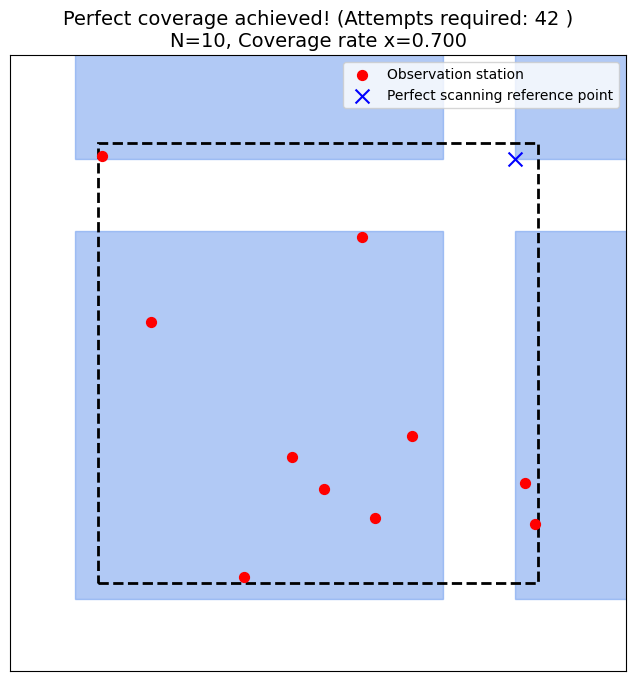

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def find_perfect_coverage(N, x, max_attempts=100000):
    """
    第一階段：尋找完美覆蓋的位置
    使用拉斯維加斯演算法，不斷隨機嘗試直到找到解。
    """
    # 檢查是否符合我們的數學定理門檻 x > 1 - 1/N
    threshold = 1 - 1/N
    print(f"【數學定理檢查】")
    print(f"點數 N={N}, 設定覆蓋率 x={x}")
    print(f"定理要求最低門檻: x > {threshold:.4f}")
    
    if x <= threshold:
        print("警告：目前的 x 沒有大於門檻，數學定理不保證有解！可能會找不到。")
    else:
        print("定理成立！保證絕對存在至少一個完美覆蓋的位置。開始搜尋...\n")

    #np.random.seed(42) # 固定種子讓點的分佈一致
    points = np.random.rand(N, 2)
    L = np.sqrt(x)
    
    attempts = 0
    best_translation = None
    all_covered = False
    
    # 不斷隨機嘗試，直到找到為止 (或達到最高嘗試次數)
    while not all_covered and attempts < max_attempts:
        attempts += 1
        # 隨機產生一個平移向量 (正方形的左下角基準點)
        translation = np.random.rand(2)
        
        # 利用 NumPy 廣播與取餘數 (% 1.0) 實作小精靈週期性邊界
        relative_pos = (points - translation) % 1.0
        
        # 檢查是否所有的點都在 L x L 的正方形內
        if np.all((relative_pos[:, 0] < L) & (relative_pos[:, 1] < L)):
            all_covered = True
            best_translation = translation
            
    if all_covered:
        print(f"【搜尋成功】電腦嘗試了 {attempts:,} 次後，成功找到了完美位置！")
        return points, L, best_translation, attempts
    else:
        print(f"【搜尋失敗】嘗試了 {max_attempts:,} 次仍未找到。請確認 x 是否大於門檻。")
        return points, L, None, attempts

def visualize_perfect_coverage(points, L, translation, N, x, attempts):
    """
    第二階段：將找到的完美覆蓋位置視覺化
    """
    if translation is None:
        print("沒有找到可用的平移位置，無法視覺化。")
        return

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    
    # 1. 畫出實驗平原邊界
    main_area = patches.Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', linestyle='--', linewidth=2, zorder=3)
    ax.add_patch(main_area)
    
    # 2. 畫出觀測站
    ax.scatter(points[:, 0], points[:, 1], color='red', s=50, zorder=5, label='Observation station')
    
    # 3. 畫出小精靈穿牆的九宮格分身
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            base_x = translation[0] + dx
            base_y = translation[1] + dy
            rect = patches.Rectangle(
                (base_x, base_y), L, L, 
                fill=True, color='cornflowerblue', alpha=0.5, 
                edgecolor='royalblue', linewidth=1, zorder=2
            )
            ax.add_patch(rect)
            
    ax.scatter(translation[0], translation[1], color='blue', marker='x', s=100, zorder=6, label='Perfect scanning reference point')
    
    ax.set_xticks([])
    ax.set_yticks([]) 
    plt.title(f"Perfect coverage achieved! (Attempts required: {attempts} )\nN={N}, Coverage rate x={x:.3f}", fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

# ==========================================
# 主程式執行區
# ==========================================
# 參數設定：N=10，根據定理 x 必須大於 0.9
N_points = 10
coverage_x = 0.70  # 設定在安全區 (0.95 > 0.90)

# 1. 執行搜尋
points_data, side_length, perfect_trans, try_count = find_perfect_coverage(N_points, coverage_x)

# 2. 執行視覺化
visualize_perfect_coverage(points_data, side_length, perfect_trans, N_points, coverage_x, try_count)

## 參考資料

- [1][平面上任意10个点一定能用互不重叠的单位圆盘覆盖吗？](https://www.bilibili.com/video/BV1HqcizoEk6)
- [2][什么是密铺？What is a Tessellation?](https://www.bilibili.com/video/BV1ub4y1y77K)